In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import glob

# userAcceleration data
# float S8g = 4096.0;
# NewAcceleration = userAcceleration/S8g ;  
# unit = g

# rotationRate data (speed of rotation)
# float RFS2000 = 16.4;
# NewRotationRate = rotationRate/RFS2000 ;  
# unit = deg/s

# attitude "oriantation" (angle of rotation) 
# unit = deg

# gravity ( gravitional force on sensor axis)
# float S8g = 4096.0;
# NewGravity = gravity/S8g ;  
# unit = g

# Get data file names
path = r'D:\_1_Technicals\DataScience_Bootcamp\Final_project\Flutter_ArduinoConnect\datasets\EDA_Phase'
filenames = glob.glob(path + "/*.csv")
dfs = []
new_col_names=["time","rotationRate_x","rotationRate_y","rotationRate_z","userAcceleration_x","userAcceleration_y","userAcceleration_z","orientation_pitch","orientation_roll","orientation_yaw","gravity_x","gravity_y","gravity_z"]
for filename in filenames:
    df = pd.read_csv(filename, index_col=False)
    df.columns =new_col_names
    df.userAcceleration_x = df.userAcceleration_x/4096.0
    df.userAcceleration_y = df.userAcceleration_y/4096.0
    df.userAcceleration_z = df.userAcceleration_z/4096.0
    
    df.rotationRate_x = df.rotationRate_x/16.4
    df.rotationRate_y = df.rotationRate_y/16.4
    df.rotationRate_z = df.rotationRate_z/16.4
    
    df.gravity_x = df.gravity_x/4096.0
    df.gravity_y = df.gravity_y/4096.0
    df.gravity_z = df.gravity_z/4096.0
    
    dfs.append(df)


In [18]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                171 non-null    int64  
 1   rotationRate_x      171 non-null    float64
 2   rotationRate_y      171 non-null    float64
 3   rotationRate_z      171 non-null    float64
 4   userAcceleration_x  171 non-null    float64
 5   userAcceleration_y  171 non-null    float64
 6   userAcceleration_z  171 non-null    float64
 7   orientation_roll    171 non-null    int64  
 8   orientation_pitch   171 non-null    int64  
 9   orientation_yaw     171 non-null    int64  
 10  gravity_x           171 non-null    float64
 11  gravity_y           171 non-null    float64
 12  gravity_z           171 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 17.5 KB


In [19]:
dfs[0].describe()

,time,rotationRate_x,rotationRate_y,rotationRate_z,userAcceleration_x,userAcceleration_y,userAcceleration_z,orientation_roll,orientation_pitch,orientation_yaw,gravity_x,gravity_y,gravity_z
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,1214.941520,9.588860,0.249964,-1.406718,0.004342,0.000066,-0.025805,-20.824561,18.479532,301.602339,0.292498,0.248749,0.612900
std,49.609025,38.329152,42.882558,57.441356,0.092345,0.068086,0.064928,29.466505,34.638017,40.747065,0.542617,0.390647,0.162420
min,1126.000000,-85.365854,-164.512195,-115.609756,-0.297119,-0.182373,-0.245117,-62.000000,-51.000000,0.000000,-0.781494,-0.397949,0.000000
25%,1172.500000,-4.115854,-5.152439,-41.859756,-0.042847,-0.042236,-0.057495,-51.000000,0.000000,265.500000,-0.006348,-0.053589,0.546997
50%,1215.000000,-0.121951,2.439024,1.707317,0.009033,-0.003418,-0.029541,-22.000000,21.000000,312.000000,0.372070,0.251465,0.620605
75%,1257.500000,11.829268,22.439024,23.201220,0.039795,0.045410,0.009033,4.000000,50.000000,333.500000,0.770264,0.604980,0.683716
max,1300.000000,234.817073,87.317073,147.439024,0.288574,0.249756,0.202637,25.000000,56.000000,346.000000,0.837646,0.847168,0.877197


In [39]:
sns.set_style("darkgrid")

RangeIndex(start=0, stop=171, step=1)

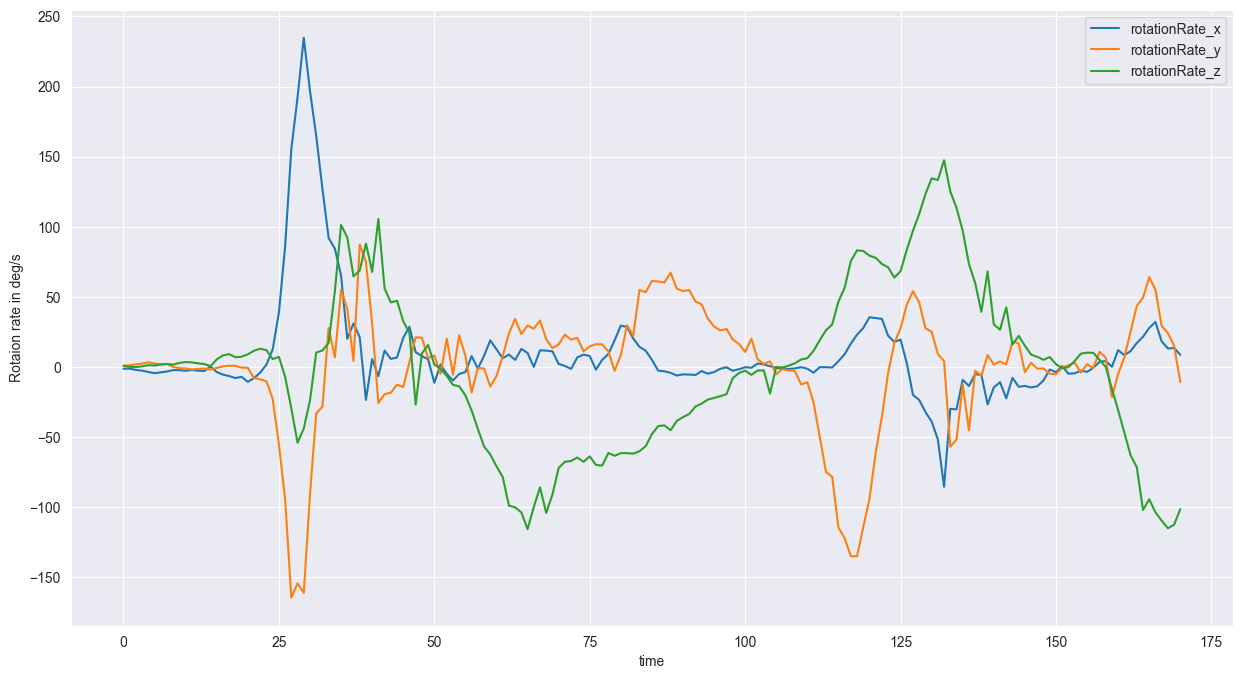

In [42]:
data_frame = dfs[0]
x_val = data_frame.index
y_col = "rotationRate"
plt.figure(figsize=(15,8))
sns.lineplot(data=data_frame, x=x_val,y=y_col+"_x",label=y_col+"_x")
sns.lineplot(data=data_frame, x=x_val,y=y_col+"_y",label=y_col+"_y")
sns.lineplot(data=data_frame, x=x_val,y=y_col+"_z",label=y_col+"_z")
plt.ylabel("Rotaion rate in deg/s")
plt.xlabel("time")
plt.legend();